In [1]:
import numpy as np
import math as m
from astropy import units as u
from astropy import constants as const
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# 1 Rotation Curves

(a) Plot A is the best representation of rigid body rotation. Plot C is the best representation of our solar system (Keplerian curve)

For rigid body the relationship is linear so $V \propto R$ For a Keplerian curve $V  \propto \frac{1}{\sqrt{r}}$

(b) Provide a detailed description of how the rotational speed of the galaxy changes (if at all) as you move away from the center of the galaxy. Based on the rotation curve, would you say that the mass of a galaxy is distributed with the overwhelming majority of mass located in the center? If not, explain how the galaxys mass would be distributed.

As distance increases from the center of the galaxy speed increases linearly like a rigid body. When the edge of the central bulge is reached the increase in speed levels off until remains constant. Based on the rotation curve I would say that the majority of the mass of the galaxy is located very far out.

(c) Is your answer in the previous question consistent with the mass distribution graph shown that comes from the light we observe from matter in the galaxy? (Do they agree?) If not, which of the two descriptions of the mass distribution of the galaxy do you believe is more correct? Why?


No, my answer is not consitent with the graph of luminous matter. The decription given in the previous question based on the graph of the rotational speed is more accurate. Non luminous, heavy matter can explain the difference in the two graphs. Dark matter causes the rotation curve to have the unusual shape.

# 2 Rotation Curves: Data

(a) Plot the data with the errorbars

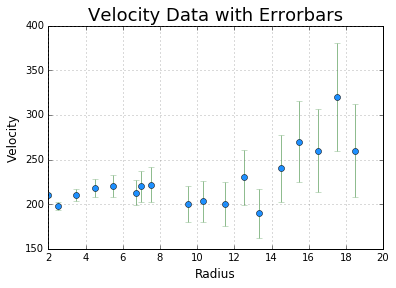

In [154]:
PHY154file = 'C:\\Users\\ianbj_000\\Documents\\Davis\\PHY 154\\Assignment 4\\Velocity_data.txt'
Velocity_data = np.loadtxt(PHY154file)
radius = Velocity_data[:,0]
velocity = Velocity_data[:,1]

e = range(len(velocity))
   
for i in range(len(velocity)):
    e[i] = velocity[i]*0.2*(i+1)/len(velocity)

plt.errorbar(radius, velocity, yerr=e, fmt='o', ecolor='#8FBC8F', color='#1E90FF', marker='o', markersize='6',)

plt.ylabel('Velocity', fontsize='12')
plt.xlabel('Radius', fontsize='12')
plt.title('Velocity Data with Errorbars', fontsize='18')
plt.grid(color='#696969', linestyle=':', linewidth='0.5')

(b) Plot rotation curves for each of the components and the combined rotation curve.

$The \ bulge: M_B = 1.3*10^{10}M_{\odot},\ a = 0.4 kpc\\
The \ disk: M_D = 6.5*10^{10}M_{\odot},\ a = 4kpc\\
The \ (visible) \ halo: M_H = 10^9M_{\odot},\ a = 0.5kpc$


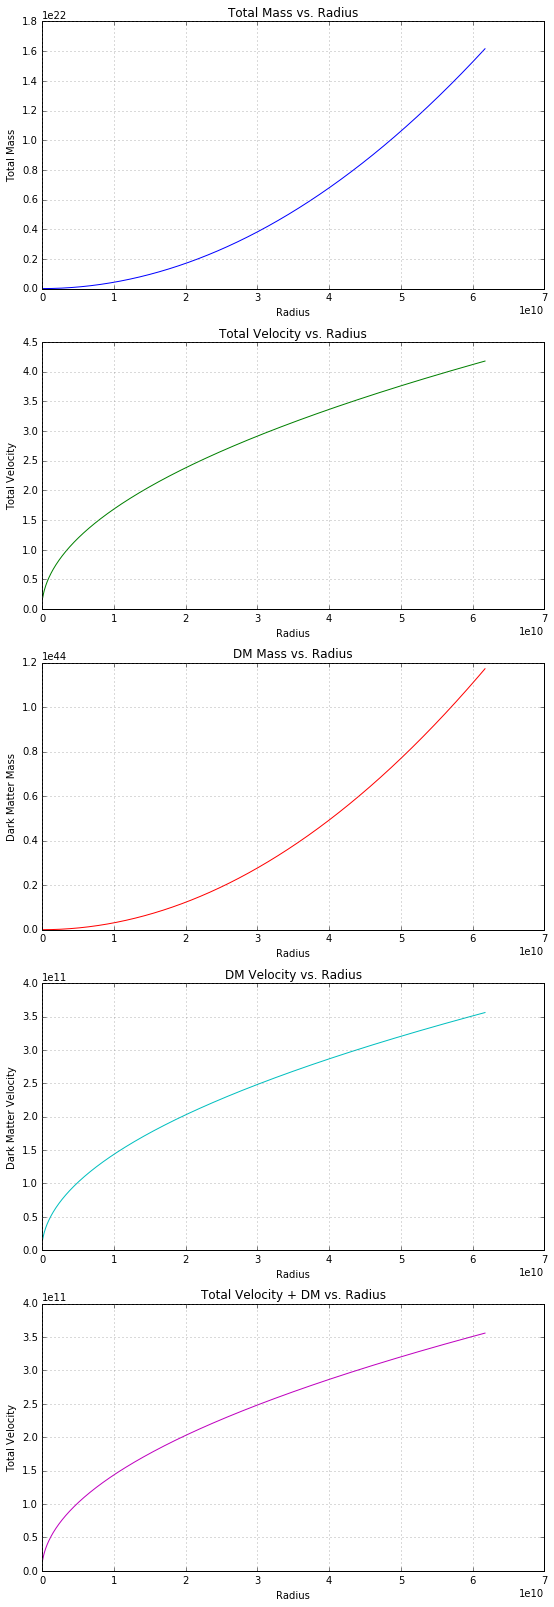

In [204]:
Ms=1.989e30
M1= (1.3e10)*Ms                                                      
a1=0.4*3.086e19
M2=1e9
a2=0.5
M3=(6.5e10)*Ms
a3=4.0*3.086e19
p_crit= 2.3
Sc=0.3
rs=230*3.086e19


def dmdr_bulge(r):
    rho1=(M1/(4*np.pi*pow(a1,3.0)))*((1+ (r/a1)**2.0)**(-5/2))
    dmdr_b=4*np.pi*(pow(r,2))*rho1
    return dmdr_b

def dmdr_halo(r):
    rho2= (M2*((a2 + (r/3.086E19)))**(-3.1))*(Ms/((3.086E19)**3))
    dmdr_h=4*np.pi*pow(r,2)*rho2
    return dmdr_h


def dmdr_disk(r):
    rho3= (M3/(2*np.pi*np.power(a3,2.0))) * (np.exp(-(r)/a3))
    dmdr_d= (2*np.pi*r)*rho3
    return dmdr_d


def dmdr_DarkMatter(r):
    rho4=(p_crit*Sc)/((r/rs)*(1+(r/rs))**2)
    dmdr_DM=4*np.pi*pow(r,2)*rho4
    return dmdr_DM

def velocity(L, r):
    v=np.sqrt((6.67E-11)*L/r)
    return v

start = 0.1
end = 20.0*3.086e9
samples = 1000

dr = end/samples
r=np.linspace(start, end, samples)                                  

m_bulge=[dr*dmdr_bulge(r[x]) for x in range(samples)]
m_halo=[dr*dmdr_halo(r[x]) for x in range(samples)]
m_disk=[(dr*dmdr_disk(r[x])) for x in range(samples)]
m_tot=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x])) for x in range(samples)]
DM=[(dr*dmdr_DarkMatter(r[x])) for x in range(samples)]
total_mass=[dr*(dmdr_halo(r[x])+dmdr_bulge(r[x])+dmdr_disk(r[x]) + dmdr_DarkMatter(r[x])) for x in range(samples)]

for i in range(samples):
    if i == 0:
        m_bulge[i] = m_bulge[i]
    else:
        m_bulge[i] += m_bulge[(i-1)]

for i in range(samples):
    if i == 0:
        m_halo[i] = m_halo[i]
    else:
        m_halo[i] += m_halo[(i-1)]
        
for i in range(samples):                                           
    if i == 0:
        m_disk[i] = m_disk[i]
    else:
        m_disk[i] += m_disk[(i-1)]        
        
for i in range(samples):
    if i == 0:
        m_tot[i] = m_tot[i]
    else:
        m_tot[i] += m_tot[(i-1)]
        
for i in range(samples):                                            
    if i == 0:
        DM[i] = DM[i]
    else:
        DM[i] += DM[(i-1)]        
               
for i in range(samples):
    if i == 0:
        total_mass[i] = total_mass[i]
    else:
        total_mass[i] += total_mass[(i-1)]
        
                
        
        
v_tot=[velocity(m_tot[x],r[x]) for x in range(samples)]
DM_velocity=[velocity(DM[x], r[x]) for x in range(samples)]
total_velocity=[velocity(total_mass[x], r[x]) for x in range(samples)]


fig= plt.figure(1, figsize=(9,45))

ax1 = fig.add_subplot(811)
ax1.plot(r, m_tot, 'b')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Mass')
ax1.set_title('Total Mass vs. Radius', loc='center')
ax1.grid(color='#696969', linestyle=':', linewidth='0.5')

ax1 = fig.add_subplot(812)
ax1.plot(r, v_tot, 'g')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')
ax1.set_title('Total Velocity vs. Radius', loc='center')
ax1.grid(color='#696969', linestyle=':', linewidth='0.5')

ax1 = fig.add_subplot(813)
ax1.plot(r, DM, 'r')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Mass')
ax1.set_title('DM Mass vs. Radius', loc='center')
ax1.grid(color='#696969', linestyle=':', linewidth='0.5')

ax1 = fig.add_subplot(814)
ax1.plot(r, DM_velocity, 'c')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Dark Matter Velocity')
ax1.set_title('DM Velocity vs. Radius', loc='center')
ax1.grid(color='#696969', linestyle=':', linewidth='0.5')

ax1 = fig.add_subplot(815)
ax1.plot(r, total_velocity, 'm')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Total Velocity')
ax1.set_title('Total Velocity + DM vs. Radius', loc='center')
ax1.grid(color='#696969', linestyle=':', linewidth='0.5')